## Extract Sphere SAXS curve from GSD file

##### Initialize sasintensity instance

In [1]:
#import necessary modules
import sys
sys.path.append('../gsd2sas')
import os
import numpy as np
import matplotlib.pyplot as plt
from sasintensity import SphereIntensity
import matplotlib.ticker as ticker


In [2]:
# Create an instance of the SphereIntensity class, corresponding to SAXS curve of spheres
# SLD of samples and solvent can be found in literature
au = SphereIntensity(volume_fraction=0.01, sld_sample=118e-6, sld_solvent=9.44e-6)

In [3]:
# Initialize form factor, unit is simulation unit.
au.set_form_factor(radius=1)

# Initialize structure factor, which requises the gsd file, N_grid, and what frames to extract
gsd = '/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/N8000.0_phi0.010_epsd7.10_delta0.25_epsY0.27_lamb4.28.gsd'
au.set_structure_factor(gsd_path=gsd, N_grid=300, frame=1)

##### Compute Structure Factor(Optional)

In [4]:
q, s = au.structure_factor.compute_s_1d()

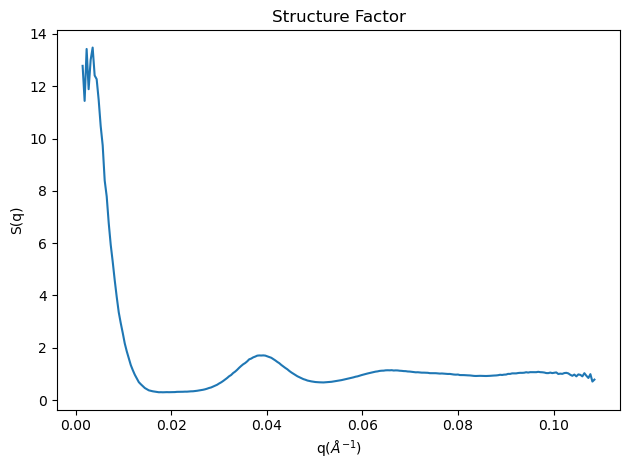

In [6]:
# the first bin of q&s need to be removed
plt.plot(q[3:-1]/100, s[3:-1], label='S(q)')
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('S(q)')
plt.title('Structure Factor')
plt.tight_layout()

#### Compute Form Factor(Optional)

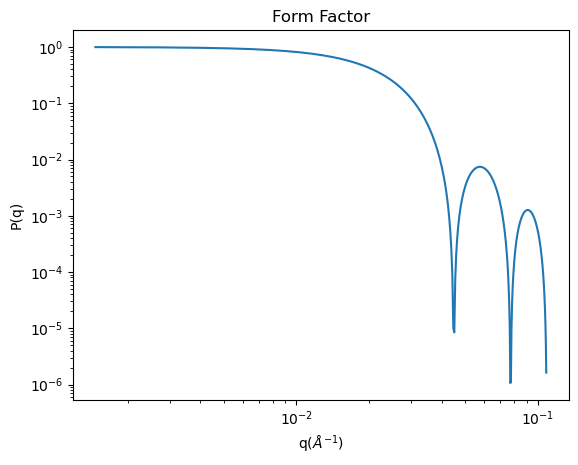

In [7]:
# Form factor of sphere is analytic, the input needs to match the one from structure factor.
p = au.form_factor.Compute_Pq(q)
plt.loglog(q[3:-1]/100,p[3:-1])
#plt.ylim(10e-1000, 5)
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('P(q)')
plt.title('Form Factor')
plt.yscale('log')

##### Compute Iq and plot

In [9]:
q, Iq = au.compute_Iq()

Text(0.5, 1.0, 'I(q)')

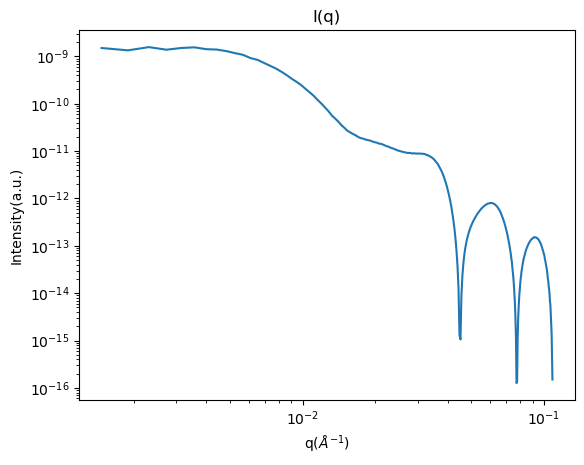

In [10]:
plt.loglog(q[3:-1]/100, Iq[3:-1])
plt.xlabel('q($\AA^{-1}$)')
plt.ylabel('Intensity(a.u.)')
plt.title('I(q)')

##### Direct I(q) Plotting

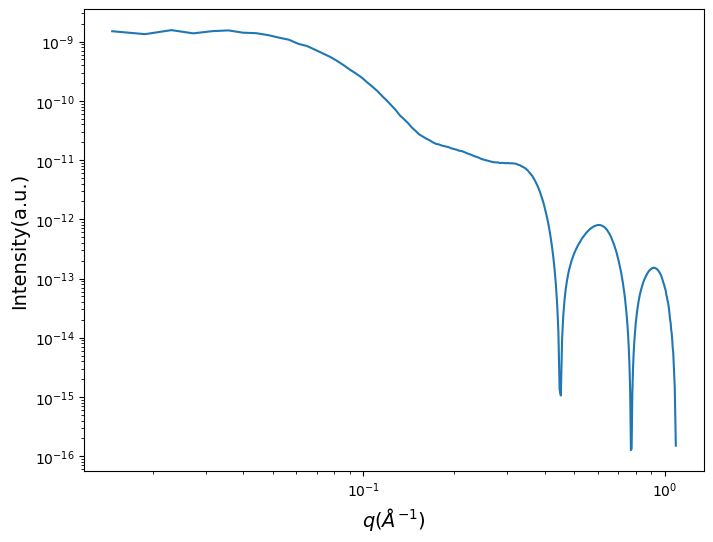

In [11]:
au.plot_Iq()